# using Machine Learning 
# Import packages

In [5]:
import pandas as pd
import numpy as np
import nltk
import os
import re

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

from nltk.corpus import wordnet as wn
nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\computer\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\computer\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [18]:
df=pd.read_csv("C:/Users/computer/Desktop/ANALYSIS PROJECT/negative.csv")

In [19]:
df

,Comment,Ratings
0,I am so angry that i made this post available...,0.0
1,No Negative,1.0
2,Rooms are nice but for elderly a bit difficul...,2.0
3,My room was dirty and I was afraid to walk ba...,3.0
4,You When I booked with your company on line y...,4.0
...,...,...
515733,no trolly or staff to help you take the lugga...,NaN
515734,The hotel looks like 3 but surely not 4,NaN
515735,The ac was useless It was a hot week in vienn...,NaN
515736,No Negative,NaN


In [20]:
df1=df=pd.read_csv("C:/Users/computer/Desktop/ANALYSIS PROJECT/dataset1 (1).csv")

In [21]:
df1

,comment,Ratings
0,"A very, very, very slow-moving, aimless movie ...",0
1,Not sure who was more lost - the flat characte...,0
2,Attempting artiness with black & white and cle...,0
3,Very little music or anything to speak of.,0
4,The best scene in the movie was when Gerardo i...,1
...,...,...
13657,a terrible movie that some people will neverth...,0
13658,there are many definitions of 'time waster' bu...,0
13659,"as it stands , crocodile hunter has the hurrie...",0
13660,the thing looks like a made-for-home-video qui...,0


In [22]:
df['comment']=df1['comment'].astype(str)

In [23]:
df['comment']

0        A very, very, very slow-moving, aimless movie ...
1        Not sure who was more lost - the flat characte...
2        Attempting artiness with black & white and cle...
3             Very little music or anything to speak of.  
4        The best scene in the movie was when Gerardo i...
                               ...                        
13657    a terrible movie that some people will neverth...
13658    there are many definitions of 'time waster' bu...
13659    as it stands , crocodile hunter has the hurrie...
13660    the thing looks like a made-for-home-video qui...
13661    enigma is well-made , but it's just too dry an...
Name: comment, Length: 13662, dtype: object

# DATA CLEANING

In [24]:
import re

REPLACE_NO_SPACE = re.compile("(\.)|(\;)|(\:)|(\!)|(\?)|(\,)|(\")|(\()|(\))|(\[)|(\])|(\d+)")
REPLACE_WITH_SPACE = re.compile("(<br\s*/><br\s*/>)|(\-)|(\/)")
NO_SPACE = ""
SPACE = " "

def preprocess_reviews(reviews):
    
    reviews = [REPLACE_NO_SPACE.sub(NO_SPACE, line.lower()) for line in reviews]
    reviews = [REPLACE_WITH_SPACE.sub(SPACE, line) for line in reviews]
    
    return reviews


reviews_clean = preprocess_reviews(df['comment'])

In [25]:
reviews_clean

['a very very very slow moving aimless movie about a distressed drifting young man  ',
 'not sure who was more lost   the flat characters or the audience nearly half of whom walked out  ',
 'attempting artiness with black & white and clever camera angles the movie disappointed   became even more ridiculous   as the acting was poor and the plot and lines almost non existent  ',
 'very little music or anything to speak of  ',
 'the best scene in the movie was when gerardo is trying to find a song that keeps running through his head  ',
 "the rest of the movie lacks art charm meaning if it's about emptiness it works i guess because it's empty  ",
 'wasted two hours  ',
 'saw the movie today and thought it was a good effort good messages for kids  ',
 'a bit predictable  ',
 'loved the casting of jimmy buffet as the science teacher  ',
 'and those baby owls were adorable  ',
 "the movie showed a lot of florida at it's best made it look very appealing  ",
 'the songs were the best and the m

# REMOVE STOP WORDS

In [26]:
from nltk.corpus import stopwords

english_stop_words = stopwords.words('english')
def remove_stop_words(corpus):
    removed_stop_words = []
    for review in corpus:
        removed_stop_words.append(
            ' '.join([word for word in review.split() 
                      if word not in english_stop_words])
        )
    return removed_stop_words

removed_stopwords = remove_stop_words(reviews_clean)

In [30]:
removed_stopwords[:10]

['slow moving aimless movie distressed drifting young man',
 'sure lost flat characters audience nearly half walked',
 'attempting artiness black & white clever camera angles movie disappointed became even ridiculous acting poor plot lines almost non existent',
 'little music anything speak',
 'best scene movie gerardo trying find song keeps running head',
 'rest movie lacks art charm meaning emptiness works guess empty',
 'wasted two hours',
 'saw movie today thought good effort good messages kids',
 'bit predictable',
 'loved casting jimmy buffet science teacher']

# Classfying labels

In [28]:
df.loc[df['Ratings'] < 1, 'Ratings'] = 0

df.loc[df['Ratings'] >0,'Ratings']=1

In [29]:
df['Ratings'].value_counts()

1    6831
0    6831
Name: Ratings, dtype: int64

In [31]:
df['Ratings'] = df['Ratings'].astype(str) 
df['Ratings']=df['Ratings'].replace(str(0),'Negative')

df['Ratings']=df['Ratings'].replace(str(1),'Positive')
df['Ratings']

0        Negative
1        Negative
2        Negative
3        Negative
4        Positive
           ...   
13657    Negative
13658    Negative
13659    Negative
13660    Negative
13661    Negative
Name: Ratings, Length: 13662, dtype: object

# Import Packages for algorithm

In [32]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import LinearSVC              
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

from spacy.symbols import nsubj, VERB
import spacy
import pickle
#from sklearn.externals import joblib
import re
import gensim
from gensim import corpora

In [33]:
import numpy as np
import pandas as pd
import nltk
import os
import re

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

from nltk.corpus import wordnet as wn
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\computer\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

# Support Vector Machine

In [34]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import LinearSVC

                
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

ngram_vectorizer = CountVectorizer(binary=True, ngram_range=(1, 1))

ngram_vectorizer.fit(df['comment'])
# filename = 'ngram_vectorizer.pkl'
# joblib.dump(ngram_vectorizer, filename)
# joblib.dump(ngram_vectorizer, filename)

X = ngram_vectorizer.transform(df['comment'])


X_train, X_test, y_train, y_test = train_test_split(
    X, df['Ratings'], train_size = 0.8)

                

for c in [0.01, 0.05, 0.25, 0.5, 1]:
    
    svm = LinearSVC(C=c)
    svm.fit(X_train, y_train)
#     filename = 'new_svm_finalized_model.pkl'
#     joblib.dump(svm, filename)

    print ("Accuracy for C=%s: %s" 
           % (c, accuracy_score(y_test, svm.predict(X_test))))
    
final_count_ngram =LinearSVC(C=0.25)
final_count_ngram.fit(X, df['Ratings'])

C:\Users\computer\Anaconda2\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


Accuracy for C=0.01: 0.7669227954628614
Accuracy for C=0.05: 0.7775338455909258
Accuracy for C=0.25: 0.7713135748261983
Accuracy for C=0.5: 0.761068422978412
Accuracy for C=1: 0.7555799487742407


LinearSVC(C=0.25, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

# TD-IDF

In [35]:
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

tfidf_vectorizer = TfidfVectorizer(binary=True, ngram_range=(1, 1))
tfidf_vectorizer.fit(df['comment'])

X = tfidf_vectorizer.transform(df['comment'])


X_train, X_test, y_train, y_test = train_test_split(
    X, df['Ratings'], train_size = 0.8)

                

for c in [0.01, 0.05, 0.25, 0.5, 1]:
    
    svm = LinearSVC(C=c)
    svm.fit(X_train, y_train)
    #filename = 'support_finalized_model.pkl'
    #joblib.dump(svm, filename)

    print ("Accuracy for C=%s: %s" 
           % (c, accuracy_score(y_test, svm.predict(X_test))))
    
final_svm_ngram =LinearSVC(C=0.01)
final_svm_ngram.fit(X, df['Ratings'])

C:\Users\computer\Anaconda2\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


Accuracy for C=0.01: 0.7544822539334065
Accuracy for C=0.05: 0.7702158799853641
Accuracy for C=0.25: 0.7925356750823271
Accuracy for C=0.5: 0.7947310647639956
Accuracy for C=1: 0.7914379802414928


LinearSVC(C=0.01, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [36]:
feature_to_coef = {
    word: coef for word, coef in zip(
     ngram_vectorizer.get_feature_names(), final_count_ngram  .coef_[0]
    )
}
for best_negative in sorted(
    feature_to_coef.items(), 
    key=lambda x: x[1])[:50]:
    print (best_negative)

('bore', -1.0425442739441757)
('junk', -0.9885879775143817)
('disappointment', -0.9876075118843703)
('mindless', -0.9711892503318474)
('poor', -0.9561745427057421)
('fails', -0.9260879634892119)
('generic', -0.9143072423223549)
('sucks', -0.8953320236844307)
('stunt', -0.8491424886396781)
('worst', -0.8465479751518868)
('mediocre', -0.846136072345446)
('uninspired', -0.8439907328391933)
('pie', -0.8319744930480008)
('exhausting', -0.8253869154406022)
('intentions', -0.8252601640367432)
('clunker', -0.819988218752197)
('guess', -0.815404782771408)
('badly', -0.8077136872460253)
('incoherent', -0.7981754005265598)
('sucked', -0.7915517943572711)
('unless', -0.7914856992504276)
('routine', -0.788737690100674)
('suffers', -0.7828611560838732)
('superficial', -0.7705101518046823)
('scares', -0.7678410546823318)
('lousy', -0.766414602662225)
('boring', -0.7651521041475478)
('tables', -0.7643227509722601)
('dull', -0.7643044122205194)
('undermines', -0.7628380493479213)
('wasn', -0.7570081748

In [37]:
for best_positive in sorted(
    feature_to_coef.items(), 
    key=lambda x: x[1], 
    reverse=True)[:50]:
    print(best_positive)
    

('liberating', 0.9305694484527178)
('engrossing', 0.9242887381086599)
('smarter', 0.9022147067336896)
('awesome', 0.8760038825592585)
('wonderful', 0.8739703958852593)
('happier', 0.8658239645296733)
('amazing', 0.8652060179742336)
('loved', 0.8455272637385339)
('delicious', 0.8450977957490204)
('remarkable', 0.8447642381161683)
('unexpected', 0.8434153193932068)
('enjoyed', 0.8329724091496329)
('fantastic', 0.8155118314874534)
('cases', 0.8122564891077868)
('dialing', 0.8025631438233696)
('glorious', 0.7924270422206257)
('entertain', 0.7918707393589134)
('incredible', 0.7895199197684175)
('enjoyable', 0.7802717525415663)
('count', 0.7790970306809184)
('nice', 0.7726715443441208)
('smith', 0.7638920502859017)
('spider', 0.7592615130462717)
('treat', 0.7543276117479543)
('comfortable', 0.7464239281804442)
('powerful', 0.7459371987639367)
('marvel', 0.7428514946265615)
('brilliant', 0.7415313217050765)
('solid', 0.7410427851598143)
('plus', 0.739600156529955)
('works', 0.7350272964517781

# Logistic Regression

# CountVectorizer

In [38]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression 
                
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

ngram_vectorizer = CountVectorizer(binary=True, ngram_range=(1, 1))

ngram_vectorizer.fit(df['comment'])
# filename = 'ngram_vectorizer.pkl'
# joblib.dump(ngram_vectorizer, filename)
# joblib.dump(ngram_vectorizer, filename)

X = ngram_vectorizer.transform(df['comment'])


X_train, X_test, y_train, y_test = train_test_split(
    X, df['Ratings'], train_size = 0.8)

                

for c in [0.01, 0.05, 0.25, 0.5, 1]:
    
    svm = LogisticRegression (C=c)
    svm.fit(X_train, y_train)
#     filename = 'new_svm_finalized_model.pkl'
#     joblib.dump(svm, filename)

    print ("Accuracy for C=%s: %s" 
           % (c, accuracy_score(y_test, svm.predict(X_test))))
    
final_count_ngram =LogisticRegression(C=0.05)
final_count_ngram.fit(X, df['Ratings'])

C:\Users\computer\Anaconda2\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)
C:\Users\computer\Anaconda2\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Accuracy for C=0.01: 0.7105744603000366
Accuracy for C=0.05: 0.7661909989023051
Accuracy for C=0.25: 0.7881448957189902
Accuracy for C=0.5: 0.7899743871203805
Accuracy for C=1: 0.7866813025978778


LogisticRegression(C=0.05, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

# TF-IDF

In [39]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

tfidf_vectorizer = TfidfVectorizer(binary=True, ngram_range=(1, 1))
tfidf_vectorizer.fit(df['comment'])

X = tfidf_vectorizer.transform(df['comment'])


X_train, X_test, y_train, y_test = train_test_split(
    X, df['Ratings'], train_size = 0.8)

                

for c in [0.01, 0.05, 0.25, 0.5, 1]:
    
    svm = LogisticRegression(C=c)
    svm.fit(X_train, y_train)
    #filename = 'support_finalized_model.pkl'
    #joblib.dump(svm, filename)

    print ("Accuracy for C=%s: %s" 
           % (c, accuracy_score(y_test, svm.predict(X_test))))
    
final_svm_ngram =LogisticRegression(C=0.25)
final_svm_ngram.fit(X, df['Ratings'])

C:\Users\computer\Anaconda2\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)
C:\Users\computer\Anaconda2\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Accuracy for C=0.01: 0.7098426637394805
Accuracy for C=0.05: 0.7200878155872668
Accuracy for C=0.25: 0.7486278814489572
Accuracy for C=0.5: 0.7650933040614709
Accuracy for C=1: 0.7760702524698134


LogisticRegression(C=0.25, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

# Positive and Negative features

In [40]:
feature_to_coef = {
    word: coef for word, coef in zip(
     ngram_vectorizer.get_feature_names(), final_count_ngram.coef_[0]
    )
}
for best_negative in sorted(
    feature_to_coef.items(), 
    key=lambda x: x[1])[:20]:
    print (best_negative)

('bad', -1.1097245171238468)
('too', -0.9422892831520552)
('worst', -0.8488761279427072)
('dull', -0.7892245656388189)
('boring', -0.6397317145641015)
('waste', -0.6313874551789602)
('fails', -0.6136970634889363)
('no', -0.5624226696848353)
('poor', -0.5613130235545055)
('script', -0.5388723739887706)
('stupid', -0.5373982655377305)
('doesn', -0.5087959618825578)
('feels', -0.4992123943679157)
('neither', -0.4956202574961212)
('only', -0.49481248459079036)
('then', -0.49415713764682145)
('idea', -0.48213092874125596)
('mess', -0.4808691690624652)
('lack', -0.4768959061806506)
('minutes', -0.4759755190074875)


In [41]:
for best_positive in sorted(
    feature_to_coef.items(), 
    key=lambda x: x[1], 
    reverse=True)[:20]:
    print(best_positive)

('great', 1.086075203722762)
('works', 0.7531477020102346)
('best', 0.6872671565981419)
('excellent', 0.6558377111799444)
('wonderful', 0.6364671587863422)
('nice', 0.6308121952666074)
('entertaining', 0.6189081451720431)
('good', 0.615403190193995)
('cinema', 0.5833156452640921)
('love', 0.5781924937795531)
('enjoyable', 0.5622540513373003)
('performances', 0.5534991804010118)
('heart', 0.5412645558178175)
('fun', 0.5385191228827813)
('beautiful', 0.5349986853895609)
('funny', 0.533131516880191)
('solid', 0.526649236050088)
('amazing', 0.5159329905785254)
('perfect', 0.4956702692134183)
('powerful', 0.49046879316131303)


# Sentiment Analysis of YouTube Comments Using Convolutional Neural Network 

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from nltk.tokenize import RegexpTokenizer
import math
import gensim
from gensim.models import Word2Vec
from gensim.models import FastText
from tensorflow.python.framework import ops
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt

In [5]:
data = pd.read_csv("C:/Users/computer/Desktop/ANALYSIS PROJECT/dataset2.csv",dtype=object,na_values=str).values

In [6]:
data

array([['A very, very, very slow-moving, aimless movie about a distressed, drifting young man.  ',
        '0'],
       ['Not sure who was more lost - the flat characters or the audience, nearly half of whom walked out.  ',
        '0'],
       ['Attempting artiness with black & white and clever camera angles, the movie disappointed - became even more ridiculous - as the acting was poor and the plot and lines almost non-existent.  ',
        '0'],
       ...,
       ["as it stands , crocodile hunter has the hurried , badly cobbled look of the 1959 godzilla , which combined scenes of a japanese monster flick with canned shots of raymond burr commenting on the monster's path of destruction .",
        '0'],
       ['the thing looks like a made-for-home-video quickie .', '0'],
       ["enigma is well-made , but it's just too dry and too placid .",
        '0']], dtype=object)

In [7]:
x = np.array(data[:,0])
y = np.array((data[:,1]))
y=np.array([int(num)for num in y])

In [8]:
print(x.shape)
print(y.shape)

(13662,)
(13662,)


In [9]:
words = []
sentences = []
tokenizer = RegexpTokenizer(r'\w+')
i = 0
for sent in x:
    for word in tokenizer.tokenize(sent):
        words.append(word.lower())
    sentences.append(words)
    words = []

In [10]:
sentences=np.array(sentences)

In [11]:
sentences

array([list(['a', 'very', 'very', 'very', 'slow', 'moving', 'aimless', 'movie', 'about', 'a', 'distressed', 'drifting', 'young', 'man']),
       list(['not', 'sure', 'who', 'was', 'more', 'lost', 'the', 'flat', 'characters', 'or', 'the', 'audience', 'nearly', 'half', 'of', 'whom', 'walked', 'out']),
       list(['attempting', 'artiness', 'with', 'black', 'white', 'and', 'clever', 'camera', 'angles', 'the', 'movie', 'disappointed', 'became', 'even', 'more', 'ridiculous', 'as', 'the', 'acting', 'was', 'poor', 'and', 'the', 'plot', 'and', 'lines', 'almost', 'non', 'existent']),
       ...,
       list(['as', 'it', 'stands', 'crocodile', 'hunter', 'has', 'the', 'hurried', 'badly', 'cobbled', 'look', 'of', 'the', '1959', 'godzilla', 'which', 'combined', 'scenes', 'of', 'a', 'japanese', 'monster', 'flick', 'with', 'canned', 'shots', 'of', 'raymond', 'burr', 'commenting', 'on', 'the', 'monster', 's', 'path', 'of', 'destruction']),
       list(['the', 'thing', 'looks', 'like', 'a', 'made', 'fo

In [12]:
model_word2vec = Word2Vec(sentences, size=300, window=15, min_count=0,workers=10,sg=0)
model_word2vec.train(sentences,total_examples=len(sentences),epochs=150)

(27959510, 36397650)

In [13]:
print(model_word2vec)
print(model_word2vec['good'])
print(model_word2vec.wv.most_similar("good"))

Word2Vec(vocab=19865, size=300, alpha=0.025)
[-2.77855420e+00  6.65964484e-02 -1.93654537e+00 -1.21791029e+00
 -1.58331037e+00  1.05325544e+00 -5.73424809e-02  5.04871035e+00
 -1.35060108e+00 -3.61951500e-01  3.11151385e+00 -1.24891913e+00
 -3.45386791e+00  3.69119000e+00 -1.36504993e-01 -1.80140293e+00
  1.46007705e+00  8.64693046e-01 -1.83737433e+00  7.46164203e-01
  1.39045072e+00  1.88813782e+00  6.41551542e+00 -1.41545963e+00
  3.85858560e+00  1.11685610e+00 -3.31201643e-01  9.27258551e-01
  2.89249802e+00 -3.79081392e+00 -1.08371270e+00 -1.14759552e+00
  3.15323234e+00 -1.00484565e-01 -4.47782660e+00 -2.79135060e+00
 -2.99419379e+00  3.28597516e-01  5.98445386e-02  5.88798225e-01
 -2.03658342e+00  3.88454854e-01 -1.31807327e-01  4.34876353e-01
  4.88743353e+00  2.53260565e+00 -2.49939275e+00 -1.47491205e+00
  4.33132267e+00  1.37230253e+00  2.08446002e+00  1.50221968e+00
 -3.80031610e+00 -2.85775042e+00  2.15223885e+00  1.90646797e-01
  1.35660207e+00  8.02652419e-01 -6.01885128e

C:\Users\computer\Anaconda2\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


In [18]:
model_word2vec.save("Saved_model_word2vec2")

In [20]:
model = Word2Vec.load("C:/Users/computer/Saved_model_word2vec2")
print(model)

Word2Vec(vocab=19865, size=300, alpha=0.025)


In [21]:
X = []
Y = []
temp = []
for i in range(0,len(sentences)):
    for j in range(0,len(sentences[i])):
        temp.append(model[sentences[i][j]])
    X.append(temp)
    temp = []

C:\Users\computer\Anaconda2\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


In [22]:
max1 = 0
for i in range(0,len(X)):
    if(len(X[i])>max1):
        max1 = len(X[i])
        pos = i
print(max1)
print(pos)
print(len(X[1]))

74
620
18


In [23]:
count = 0
for i in range(0,len(X)):
    if(len(X[i])>64):
        count = count + 1
print(count)

2


In [24]:
import keras
from keras.preprocessing.sequence import pad_sequences
X_new = keras.preprocessing.sequence.pad_sequences(sequences=X, maxlen=64, dtype='float32', padding='post', truncating='post', value=0.0)

Using TensorFlow backend.


In [25]:
X = X_new

In [26]:
Y = tf.keras.utils.to_categorical(y)

In [27]:
def create_placeholders(seq_length, embedding_size, n_y):
    
#     Creates the placeholders for the tensorflow session.
    
#     Arguments:
#     n_H0 -- scalar, height of an input image
#     n_W0 -- scalar, width of an input image
#     n_C0 -- scalar, number of channels of the input
#     n_y -- scalar, number of classes
        
#     Returns:
#     X -- placeholder for the data input, of shape [None, n_H0, n_W0, n_C0] and dtype "float"
#     Y -- placeholder for the input labels, of shape [None, n_y] and dtype "float"
    

    X = tf.placeholder(dtype = tf.float32, shape=(None,seq_length,embedding_size,1))
    Y = tf.placeholder(dtype = tf.float32, shape=(None,n_y))
    
    return X, Y

In [28]:
def create_placeholders(seq_length, embedding_size, n_y):
    
#     Creates the placeholders for the tensorflow session.
    
#     Arguments:
#     n_H0 -- scalar, height of an input image
#     n_W0 -- scalar, width of an input image
#     n_C0 -- scalar, number of channels of the input
#     n_y -- scalar, number of classes
        
#     Returns:
#     X -- placeholder for the data input, of shape [None, n_H0, n_W0, n_C0] and dtype "float"
#     Y -- placeholder for the input labels, of shape [None, n_y] and dtype "float"
    

    X = tf.placeholder(dtype = tf.float32, shape=(None,seq_length,embedding_size,1))
    Y = tf.placeholder(dtype = tf.float32, shape=(None,n_y))
    
    return X, Y

In [29]:
def initialize_parameters(filter_sizes,embedding_size,num_filters):
    # Initializes weight parameters
    W1 = tf.get_variable("W1",[filter_sizes[0],embedding_size,1,num_filters],dtype=tf.float32,initializer=tf.contrib.layers.xavier_initializer(seed=0),regularizer = tf.contrib.layers.l2_regularizer(scale=0.1))
    W2 = tf.get_variable("W2",[filter_sizes[1],embedding_size,1,num_filters],dtype=tf.float32,initializer=tf.contrib.layers.xavier_initializer(seed=0),regularizer = tf.contrib.layers.l2_regularizer(scale=0.1))
    W3 = tf.get_variable("W3",[filter_sizes[2],embedding_size,1,num_filters],dtype=tf.float32,initializer=tf.contrib.layers.xavier_initializer(seed=0),regularizer = tf.contrib.layers.l2_regularizer(scale=0.1))
    W4 = tf.get_variable("W4",[filter_sizes[3],embedding_size,1,num_filters],dtype=tf.float32,initializer=tf.contrib.layers.xavier_initializer(seed=0),regularizer = tf.contrib.layers.l2_regularizer(scale=0.1))
    
    parameters = {"W1": W1,
                  "W2": W2,
                  "W3": W3,
                  "W4": W4}
    
    return parameters


In [30]:
def forward_propagation(X,filter_sizes,embedding_size,num_filters,seq_length,parameters):
    print("X shape:",X.shape)
    #P = []
    W1 = parameters['W1']
    W2 = parameters['W2']
    W3 = parameters['W3']
    W4 = parameters['W4']
    print("W1 shape :",W1.shape)
    print("W2 shape :",W2.shape)
    print("W3 shape :",W3.shape)
    print("W4 shape :",W4.shape)
    #W1 = initialize_parameters(filter_sizes[0],embedding_size,num_filters)
    Z1 = tf.nn.conv2d(X,W1,strides=[1,1,1,1],padding="VALID")
    A1 = tf.nn.relu(Z1)
    P1 = tf.nn.max_pool(A1,ksize=[1,seq_length-filter_sizes[0]+1,1,1],strides=[1,1,1,1],padding="VALID")
    #P.append(P1)
    print("Z1 shape:",Z1.shape)
    print("P1 shape:",P1.shape)
    #W2 = initialize_parameters(filter_sizes[1],embedding_size,num_filters)
    Z2 = tf.nn.conv2d(X,W2,strides=[1,1,1,1],padding="VALID")
    A2 = tf.nn.relu(Z2)
    P2 = tf.nn.max_pool(A2,ksize=[1,seq_length-filter_sizes[1]+1,1,1],strides=[1,1,1,1],padding="VALID")
    #P.append(P2)
    print("Z2 shape:",Z2.shape)
    print("P2 shape:",P2.shape)
    
    #W3 = initialize_parameters(filter_sizes[2],embedding_size,num_filters)
    Z3 = tf.nn.conv2d(X,W3,strides=[1,1,1,1],padding="VALID")
    A3 = tf.nn.relu(Z3)
    P3 = tf.nn.max_pool(A3,ksize=[1,seq_length-filter_sizes[2]+1,1,1],strides=[1,1,1,1],padding="VALID")
    #P.append(P3)
    print("Z3 shape:",Z3.shape)
    print("P3 shape:",P3.shape)
    
    #W4 = initialize_parameters(filter_sizes[3],embedding_size,num_filters)
    Z4 = tf.nn.conv2d(X,W4,strides=[1,1,1,1],padding="VALID")
    A4 = tf.nn.relu(Z4)
    P4 = tf.nn.max_pool(A4,ksize=[1,seq_length-filter_sizes[3]+1,1,1],strides=[1,1,1,1],padding="VALID")
    #P.append(P4)
    print("Z4 shape:",Z4.shape)
    print("P4 shape:",P4.shape)
    #P = np.array(P)
    P = tf.concat([P1,P2,P3,P4],3)
    print("P shape:",P.shape)
    P = tf.contrib.layers.flatten(P)
    print("P shape flattened",P.shape)
    Z5 = tf.contrib.layers.fully_connected(P,2,activation_fn = None)
    print("Z5 shape:",Z5.shape)
    return Z5

In [31]:
def compute_cost(Z5, Y):
    """
    Computes the cost
    
    Arguments:
    Z5 -- output of forward propagation (output of the last LINEAR unit), of shape (number of examples,2)
    Y -- "true" labels vector placeholder, same shape as Z5
    
    Returns:
    cost - Tensor of the cost function
    """
    
    cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits = Z5, labels = Y))
    reg_losses = tf.get_collection(tf.GraphKeys.REGULARIZATION_LOSSES)
    reg_constant = 0.01  # Choose an appropriate one.
    loss = cost + reg_constant * sum(reg_losses)
    
    return loss

In [32]:
def random_mini_batches(X, Y, mini_batch_size, seed = 0):
    np.random.seed(seed)            
    m = X.shape[0]                  # number of training examples
    mini_batches = []
    #print("X shape:",X.shape)
    #print("Y shape",Y.shape)
    # Step 1: Shuffle (X, Y)
    permutation = list(np.random.permutation(m))
    shuffled_X = X[permutation,:]
    #print("Shuffled X shape",shuffled_X.shape)
    shuffled_Y = Y[permutation,:]#.reshape((2,m))
    #print("Shuffled Y shape",shuffled_Y.shape)
    # Step 2: Partition (shuffled_X, shuffled_Y). Minus the end case.
    num_complete_minibatches = math.floor(m/mini_batch_size) # number of mini batches of size mini_batch_size in your partitionning
    for k in range(0, num_complete_minibatches):
        mini_batch_X = shuffled_X[k*mini_batch_size:(k+1)*mini_batch_size,:]
        mini_batch_Y = shuffled_Y[k*mini_batch_size:(k+1)*mini_batch_size,:]#.reshape((2,m))
        
        mini_batch = (mini_batch_X, mini_batch_Y)
        mini_batches.append(mini_batch)
    
    # Handling the end case (last mini-batch < mini_batch_size)
    if m % mini_batch_size != 0:
        mini_batch_X = shuffled_X[num_complete_minibatches*mini_batch_size:m,:]
        mini_batch_Y = shuffled_Y[num_complete_minibatches*mini_batch_size:m,:]#.reshape((2,m))
        
        mini_batch = (mini_batch_X, mini_batch_Y)
        mini_batches.append(mini_batch)
    
    return mini_batches

In [33]:
def model(X_train, Y_train, X_test, Y_test, learning_rate = 0.005,
          num_epochs = 50, minibatch_size = 512, print_cost = True):
    ops.reset_default_graph()                         # to be able to rerun the model without overwriting tf variables
    tf.set_random_seed(1)                             # to keep results consistent (tensorflow seed)
    seed = 3                                          # to keep results consistent (numpy seed)
    
    # To be used if not using stochastic
    (m, seq_length, embedding_size,nc) = X_train.shape             
    ##-----------------------------------------###
    
    
    ## To be used if using Stochastic ##
#     m = X_train.shape[0]
#     seq_length = X_train.shape[2]
#     embedding_size = X_train.shape[3]
#     nc = X_train.shape[4]
    ##------------------------------------####
    
    
    
    n_y = Y_train.shape[1]            # 2 - stochastic;  1 - otherwise                            
    costs = []                                        # To keep track of the cost
    filter_sizes = [2,4,7,9]
    num_filters = 8
    # Create Placeholders of the correct shape
    X, Y = create_placeholders(seq_length, embedding_size, n_y)

    # Initialize parameters
    parameters = initialize_parameters(filter_sizes,embedding_size,num_filters)
    
    # Forward propagation: Build the forward propagation in the tensorflow graph

    Z5 = forward_propagation(X,filter_sizes,embedding_size,num_filters,seq_length,parameters)
    
    # Cost function: Add cost function to tensorflow graph
    cost = compute_cost(Z5, Y)
    
    # Backpropagation: Define the tensorflow optimizer. Use an AdamOptimizer that minimizes the cost.
    optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)
    
    # Initialize all the variables globally
    init = tf.global_variables_initializer()
     
    # Start the session to compute the tensorflow graph
    with tf.Session() as sess:
        
        # Run the initialization
        sess.run(init)
        
        # Do the training loop
        for epoch in range(0,num_epochs):
            #_, temp_cost = sess.run([optimizer, cost], feed_dict = {X:X_train, Y:Y_train})  #Batch Gradient Descent

            minibatch_cost = 0.
            num_minibatches = int(m / minibatch_size) # number of minibatches of size minibatch_size in the train set
            seed = seed + 1
            minibatches = random_mini_batches(X_train, Y_train, minibatch_size, seed)

            for minibatch in minibatches:

                # Select a minibatch
                (minibatch_X, minibatch_Y) = minibatch
                # IMPORTANT: The line that runs the graph on a minibatch.
                # Run the session to execute the optimizer and the cost, the feedict should contain a minibatch for (X,Y).
            
                _ , temp_cost = sess.run([optimizer, cost], feed_dict = {X: minibatch_X, Y: minibatch_Y})     # mini_batch gradieent descent
                
                
                minibatch_cost += temp_cost / num_minibatches
#             stochastic_cost=0    
#             for i in range(0,m):
#                 _, temp_cost = sess.run([optimizer, cost], feed_dict = {X:X_train[i], Y:Y_train[i]}) 
#                 stochastic_cost += temp_cost/m
#                 if(i%10==0):
#                     print("Cost after",i,"iterations =",stochastic_cost)
                
            #Print the cost every epoch
            if print_cost == True and epoch % 5 == 0:
                print ("Cost after epoch %i: %f" % (epoch, minibatch_cost))
            if print_cost == True and epoch % 1 == 0:
                costs.append(minibatch_cost)
#             if print_cost == True and epoch % 5 == 0:
#                 print ("Cost after epoch %i: %f" % (epoch, stochastic_cost))
#             if print_cost == True and epoch % 1 == 0:
#                 costs.append(stochastic_cost)
#             if print_cost == True and epoch % 5 == 0:
#                 print ("Cost after epoch %i: %f" % (epoch, temp_cost))
#             if print_cost == True and epoch % 1 == 0:
#                 costs.append(temp_cost)
        
        
        # plot the cost
        plt.plot(np.squeeze(costs))
        plt.ylabel('cost')
        plt.xlabel('iterations (per tens)')
        plt.title("Learning rate =" + str(learning_rate))
        plt.show()
        
        
        # Calculate the correct predictions
        print("Z5 shape:",Z5.shape)
        predict_op = tf.argmax(Z5, 1)
        print("predict_op shape:",predict_op.shape)
        correct_prediction = tf.equal(predict_op, tf.argmax(Y,1))
        print("Correct prediction shape:",correct_prediction.shape)
        # Calculate accuracy on the test set
        accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
        print("accuracy shape:",accuracy.shape)

        train_accuracy = accuracy.eval({X: X_train, Y: Y_train})
        test_accuracy = accuracy.eval({X: X_test, Y: Y_test})

        print("Train Accuracy:", train_accuracy)
        print("Test Accuracy:", test_accuracy)
                
        #return train_accuracy, test_accuracy, predict_op,parameters
        return predict_op,correct_prediction,parameters,accuracy

In [34]:
print(np.shape(X))
print(np.shape(Y))
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25)

(13662, 64, 300)
(13662, 2)


In [35]:
print(np.shape(X_train))
print(np.shape(Y_train))

(10246, 64, 300)
(10246, 2)


In [36]:
X_train = np.expand_dims(X_train,axis=3)
X_test = np.expand_dims(X_test,axis=3)

In [37]:
print(np.shape(X_train))
print(np.shape(Y_train))

(10246, 64, 300, 1)
(10246, 2)


C:\Users\computer\Anaconda2\lib\site-packages\dask\dataframe\utils.py:13: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm



For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
If you depend on functionality not listed there, please file an issue.

Instructions for updating:
Colocations handled automatically by placer.
X shape: (?, 64, 300, 1)
W1 shape : (2, 300, 1, 8)
W2 shape : (4, 300, 1, 8)
W3 shape : (7, 300, 1, 8)
W4 shape : (9, 300, 1, 8)
Z1 shape: (?, 63, 1, 8)
P1 shape: (?, 1, 1, 8)
Z2 shape: (?, 61, 1, 8)
P2 shape: (?, 1, 1, 8)
Z3 shape: (?, 58, 1, 8)
P3 shape: (?, 1, 1, 8)
Z4 shape: (?, 56, 1, 8)
P4 shape: (?, 1, 1, 8)
P shape: (?, 1, 1, 32)
Instructions for updating:
Use keras.layers.flatten instead.
P shape flattened (?, 32)
Z5 shape: (?, 2)
Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.

Cost after epoch 0: 0.906797
Cost after epoch 5: 0.403099

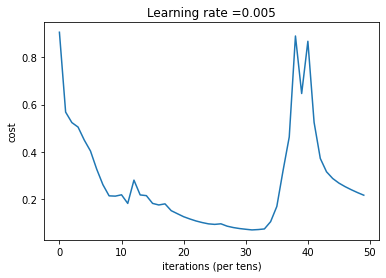

Z5 shape: (?, 2)
predict_op shape: (?,)
Correct prediction shape: (?,)
accuracy shape: ()
Train Accuracy: 0.9996096
Test Accuracy: 0.71399295


In [38]:
predict_op,correct_prediction,parameters,accuracy = model(X_train, Y_train, X_test, Y_test)